In [1]:
import plot_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Suppress divide by zero, overflow, and invalid warnings globally
np.seterr(divide='ignore', over='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
MRP_params = np.load('results/01/MRP.npz')

In [4]:
# Load data for alpha = 2/3, the proposed optimal choice
iid_results1 = np.load('results/01/iid_results.npz')

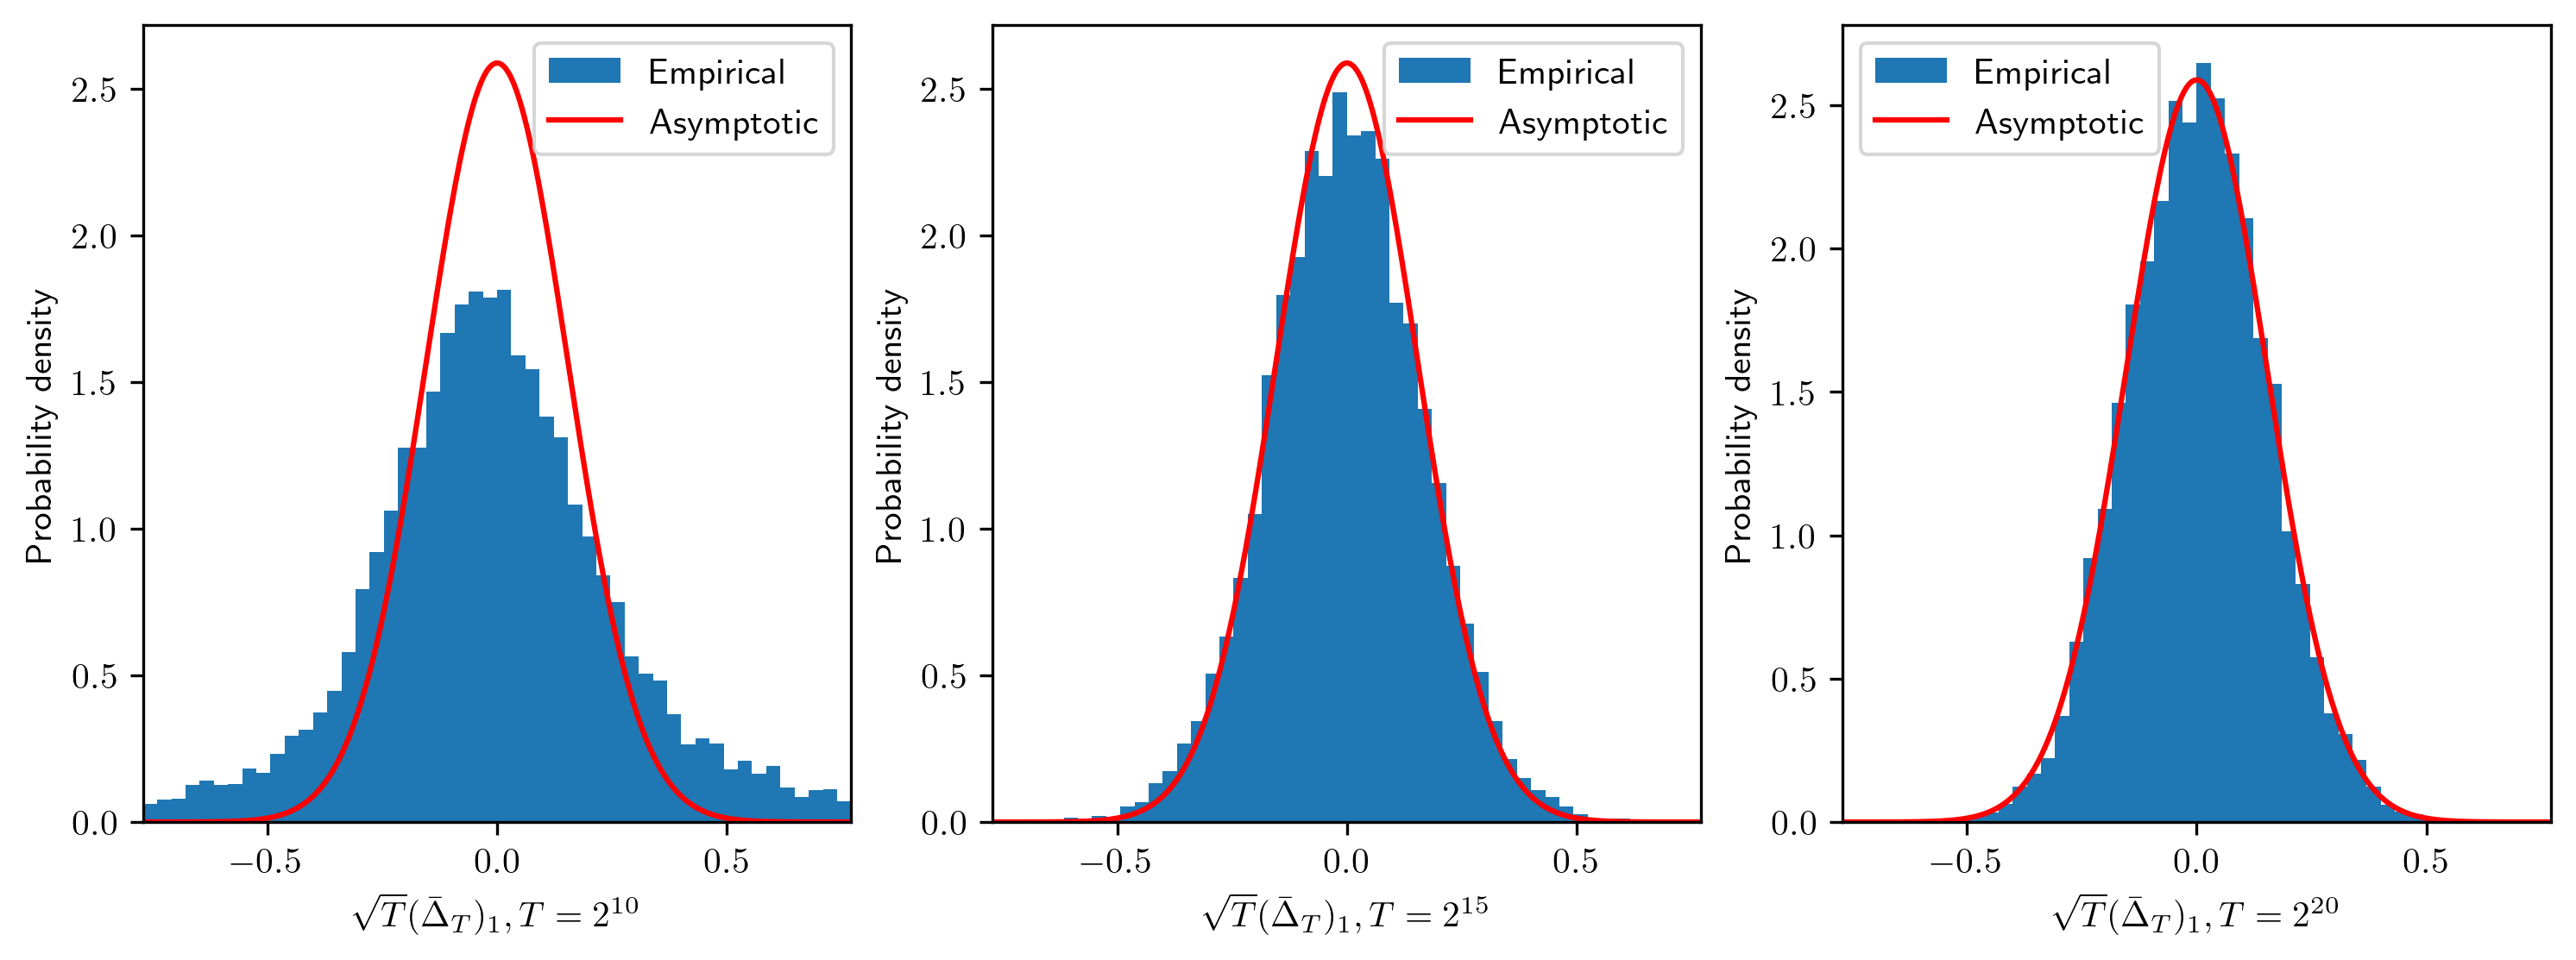

In [5]:
# Figure 1

plt.figure(dpi = 300, figsize = (12,4))
plt.rcParams['text.usetex'] = True
plt.subplot(1,3,1)
plot_utils.compare_histograms(MRP_params, iid_results1, iter_index = 9, xlabel = r'$\sqrt{T}(\bar{\Delta}_T)_1,T=2^{10}$')
plt.subplot(1,3,2)
plot_utils.compare_histograms(MRP_params, iid_results1, iter_index = 14, xlabel = r'$\sqrt{T}(\bar{\Delta}_T)_1,T=2^{15}$')
plt.subplot(1,3,3)
plot_utils.compare_histograms(MRP_params, iid_results1, iter_index = 19, xlabel = r'$\sqrt{T}(\bar{\Delta}_T)_1,T=2^{20}$')
plt.savefig('reproduce_plots/figure_1.pdf')

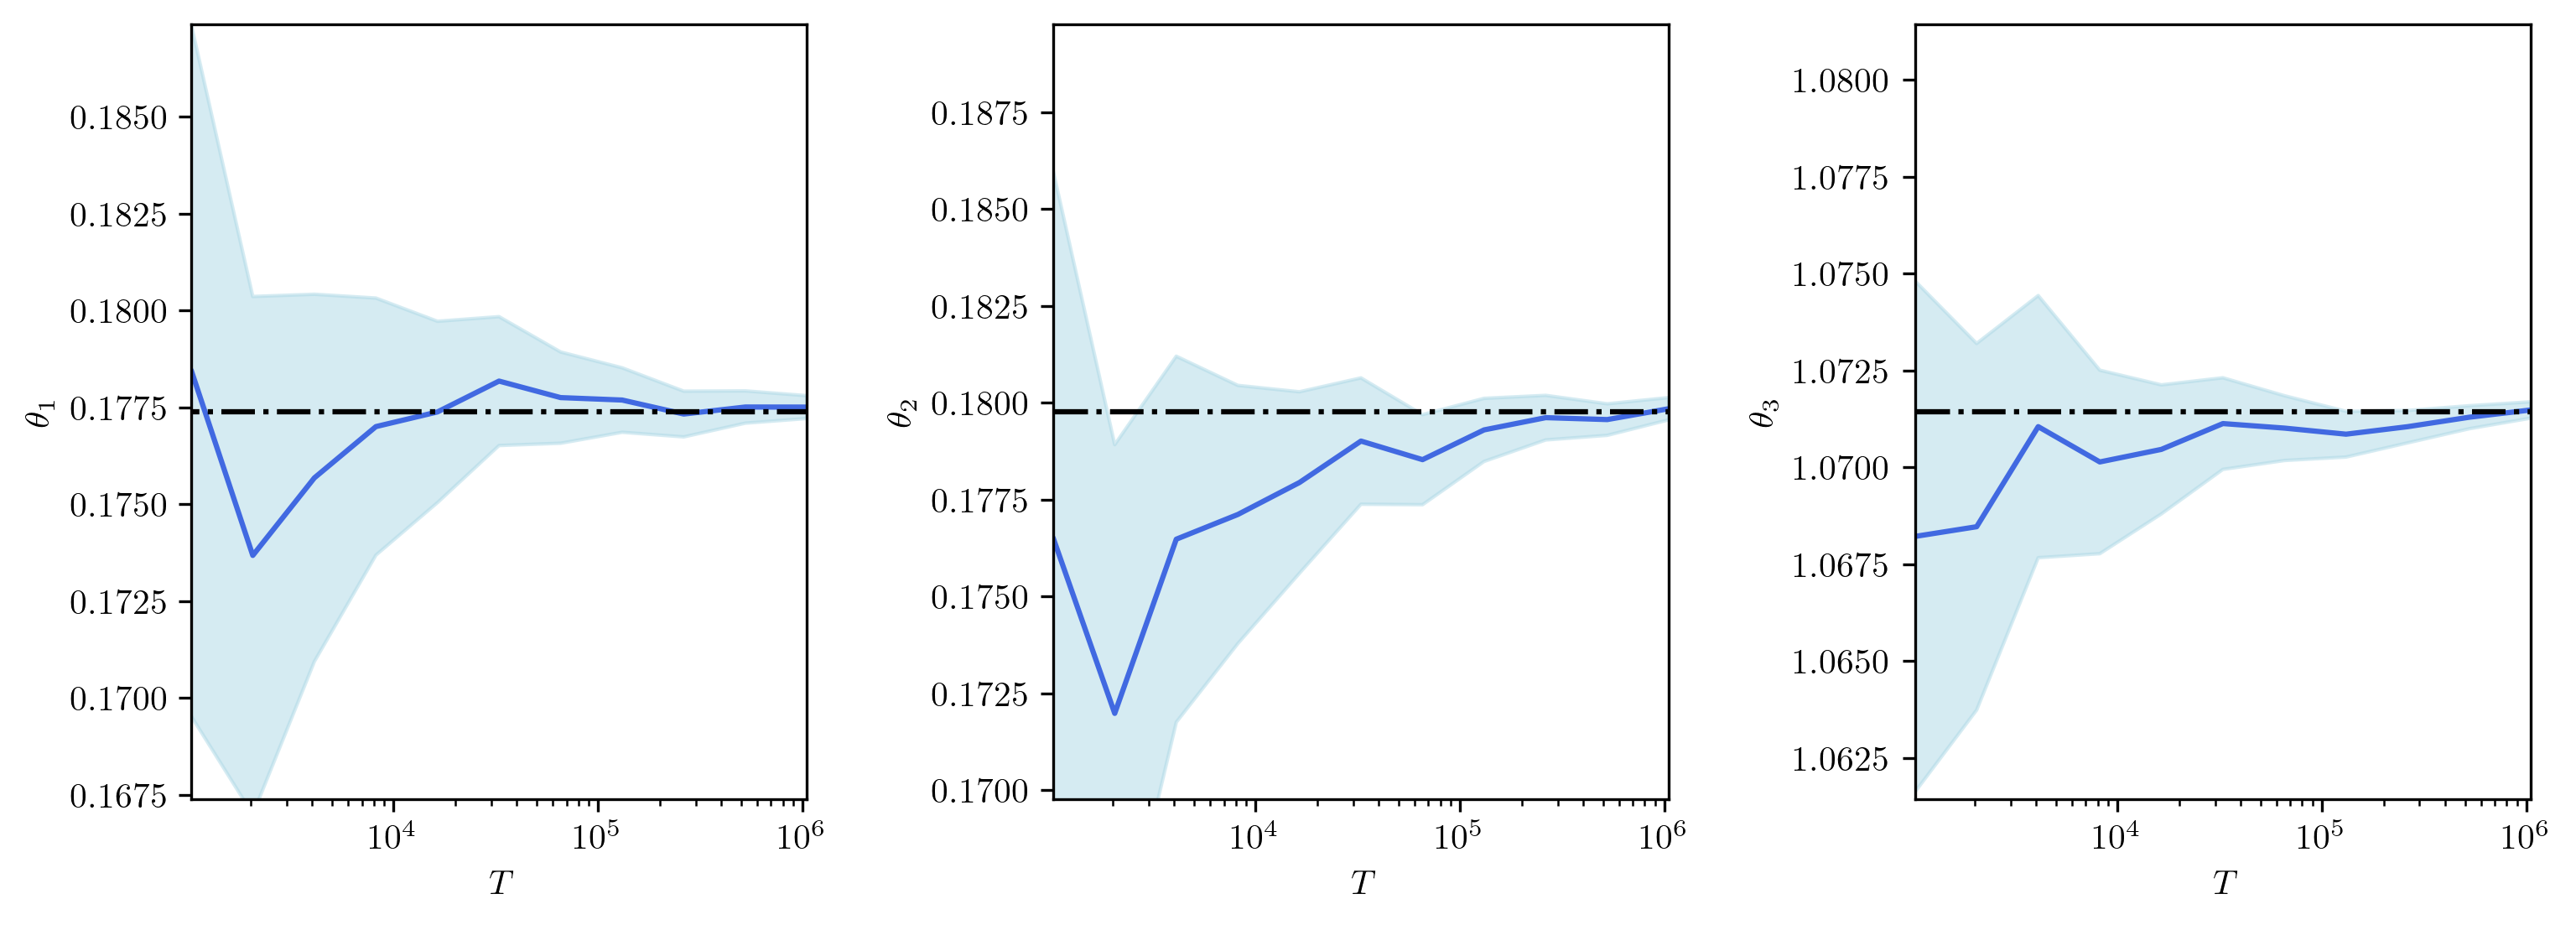

In [6]:
# Figure 6

plot_utils.one_trial_CIs(MRP_params, iid_results1)
plt.savefig('reproduce_plots/figure_6.pdf')

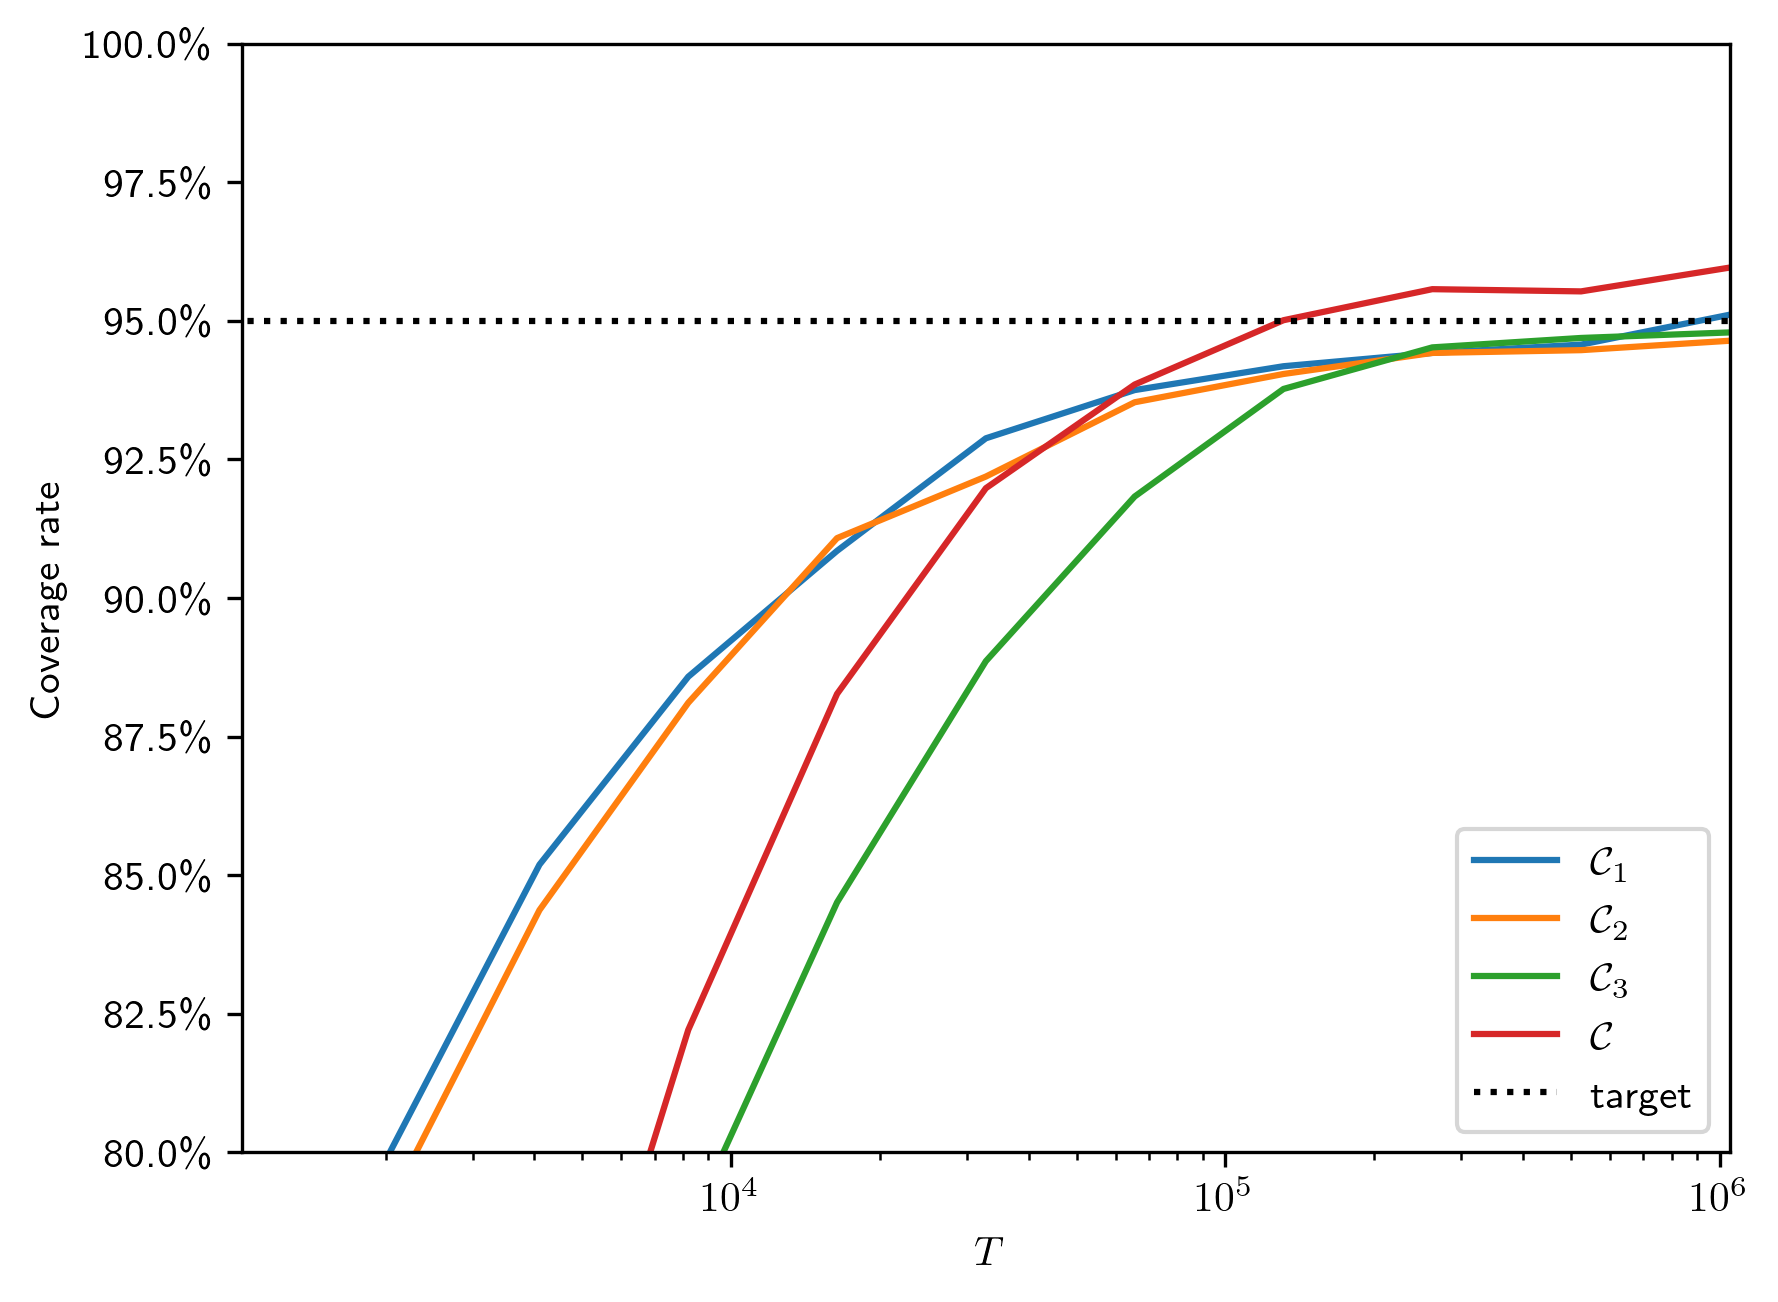

In [7]:
# Figure 7

plot_utils.plot_CI_cover_rates(MRP_params, iid_results1)
plt.savefig('reproduce_plots/figure_7.pdf')

In [8]:
# Load data for different choices of alpha
iid_results2 = np.load('results/02/iid_results.npz') # alpha = 1/2
iid_results3 = np.load('results/03/iid_results.npz') # alpha = 3/4
iid_results5 = np.load('results/05/iid_results.npz') # alpha = 1

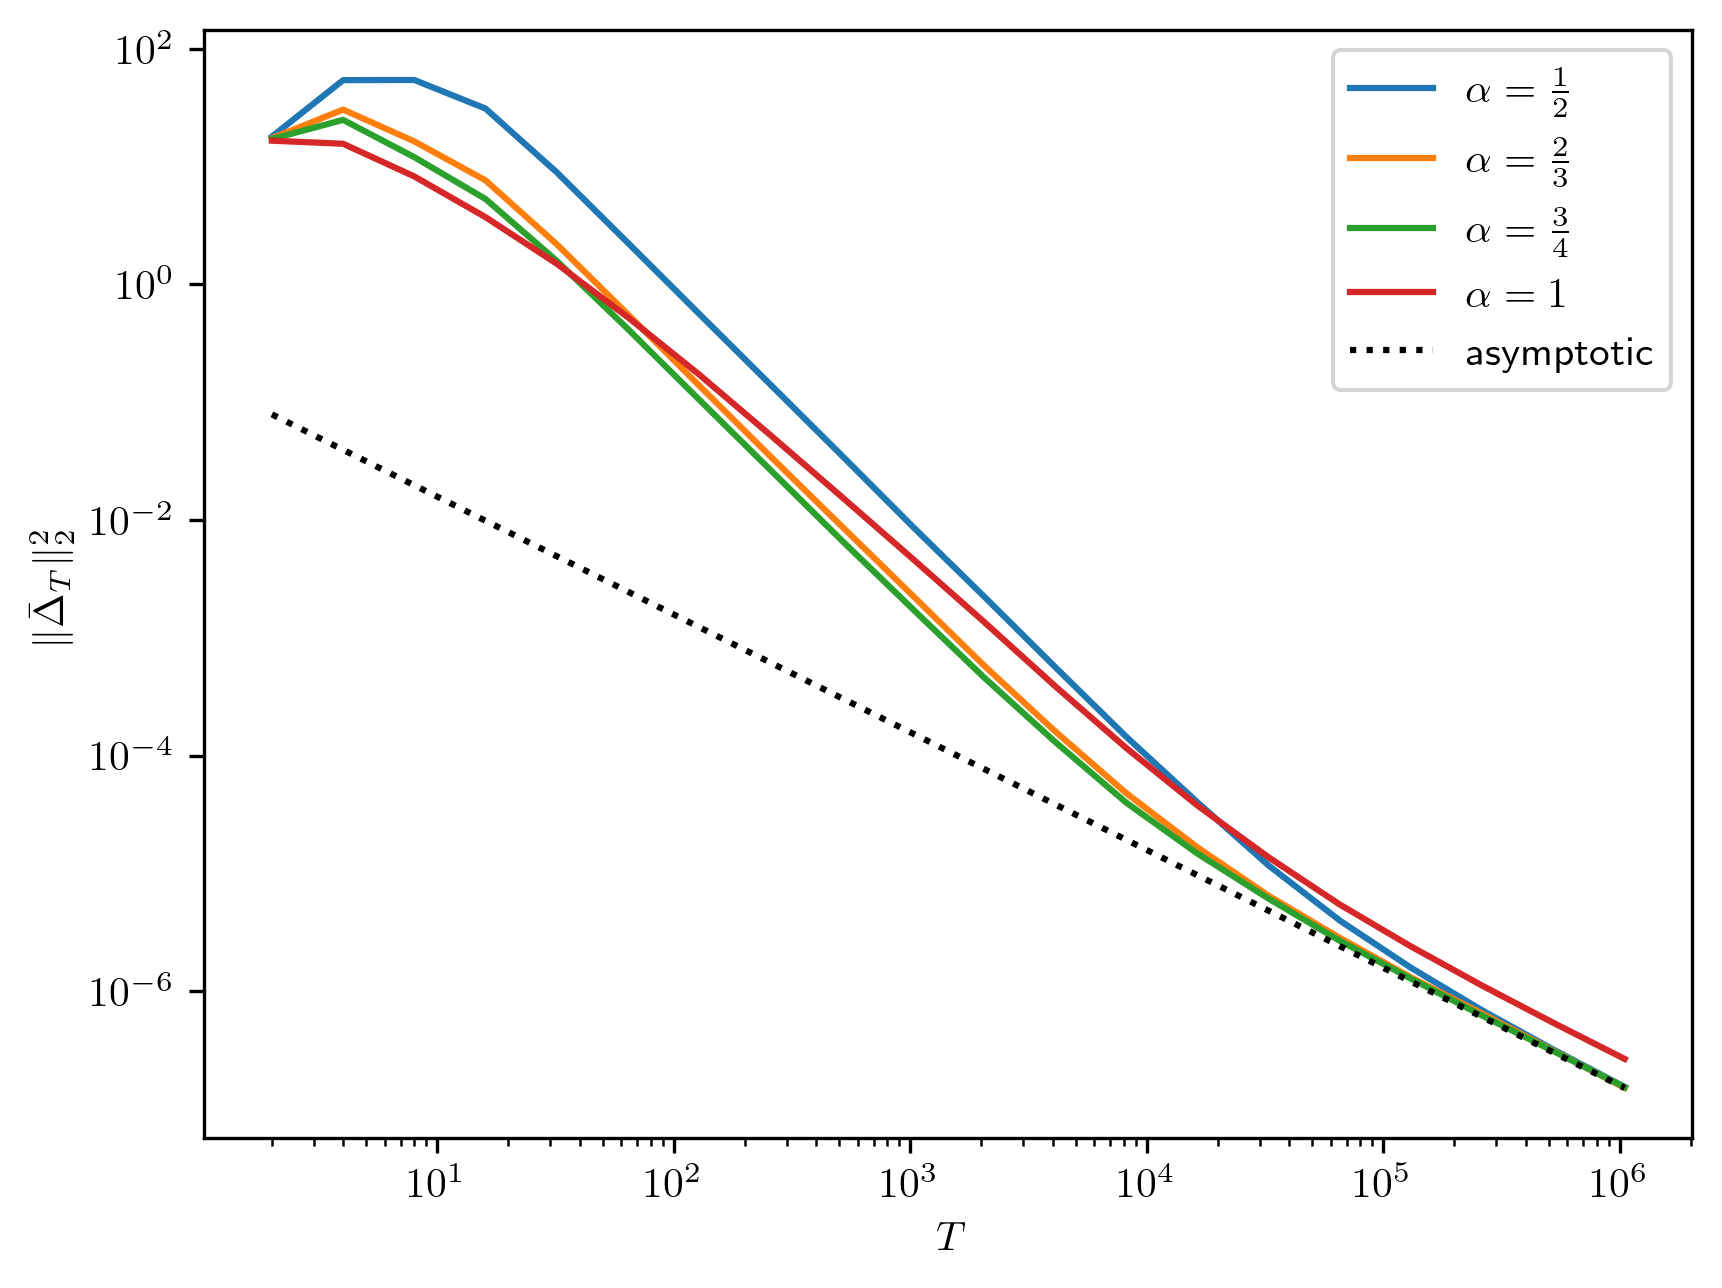

In [9]:
# Figure 3(a)

plt.rcParams['text.usetex'] = True
plt.figure(dpi = 300)
q = 0.95

plot_utils.plot_L2_norm_quantiles(iid_results2, q, label = r'$\alpha = \frac{1}{2}$')
plot_utils.plot_L2_norm_quantiles(iid_results1, q, label = r'$\alpha = \frac{2}{3}$')
plot_utils.plot_L2_norm_quantiles(iid_results3, q, label = r'$\alpha = \frac{3}{4}$')
plot_utils.plot_L2_norm_quantiles(iid_results5, q, label = r'$\alpha = 1$')
asymptotic_quantile = plot_utils.estimate_norm_quantiles(MRP_params['Lambda_star'], q)
plt.plot(iid_results1['save_iter'], 
         asymptotic_quantile / iid_results1['save_iter'],
         color = 'black',
         linestyle = 'dotted',
         label = 'asymptotic')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$T$')
plt.ylabel(r'$\|\bar{\Delta}_T\|_2^2$')
plt.legend()
plt.savefig('reproduce_plots/figure_3a.pdf')

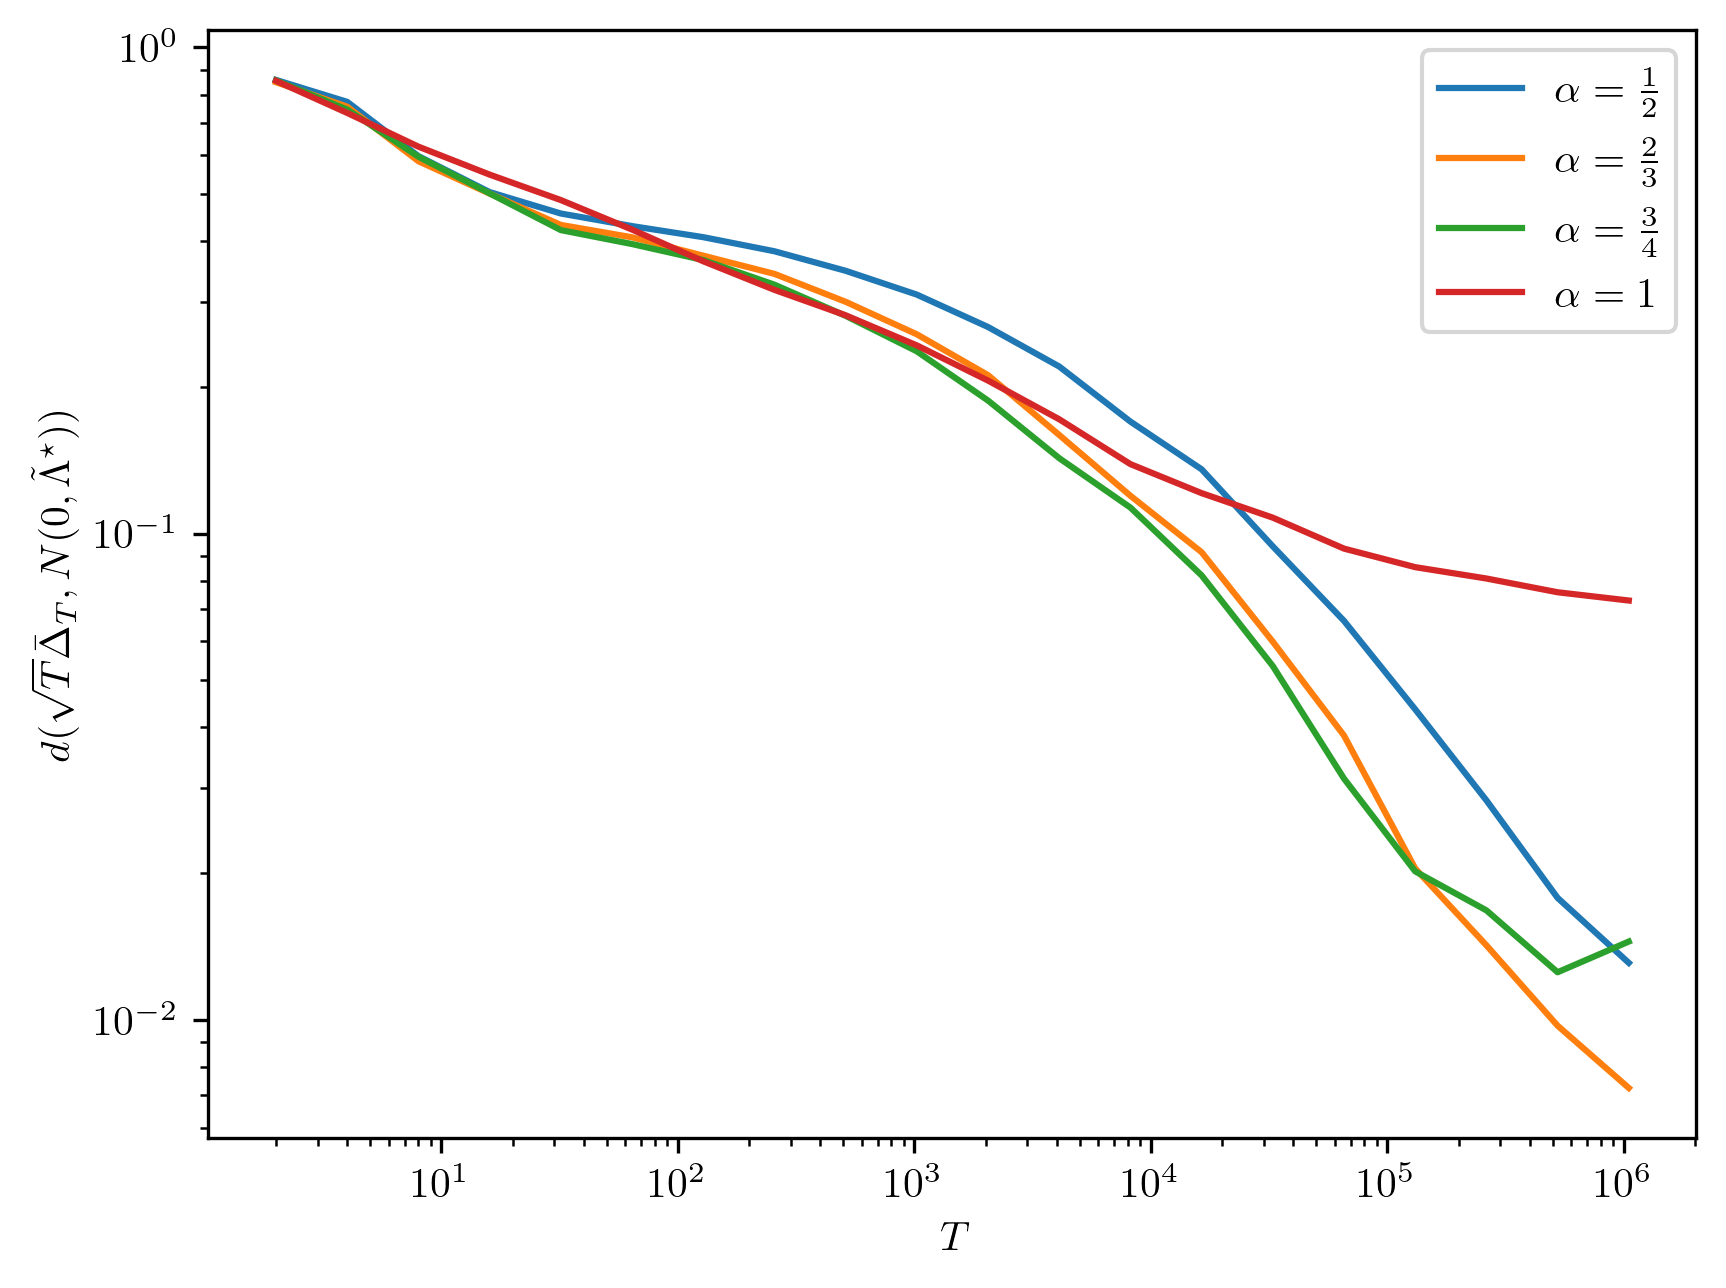

In [10]:
# Figure 2 and Figure 4(a)
plt.figure(dpi = 300)
plt.rcParams['text.usetex'] = True

plot_utils.compare_emp_asy(MRP_params, iid_results2, label = r'$\alpha = \frac{1}{2}$')
plot_utils.compare_emp_asy(MRP_params, iid_results1, label = r'$\alpha = \frac{2}{3}$')
plot_utils.compare_emp_asy(MRP_params, iid_results3, label = r'$\alpha = \frac{3}{4}$')
plot_utils.compare_emp_asy(MRP_params, iid_results5, label = r'$\alpha = 1$')
plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$d(\sqrt{T}\bar{\Delta}_T,N(0,\tilde{\Lambda}^\star))$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('reproduce_plots/figure_2.pdf')

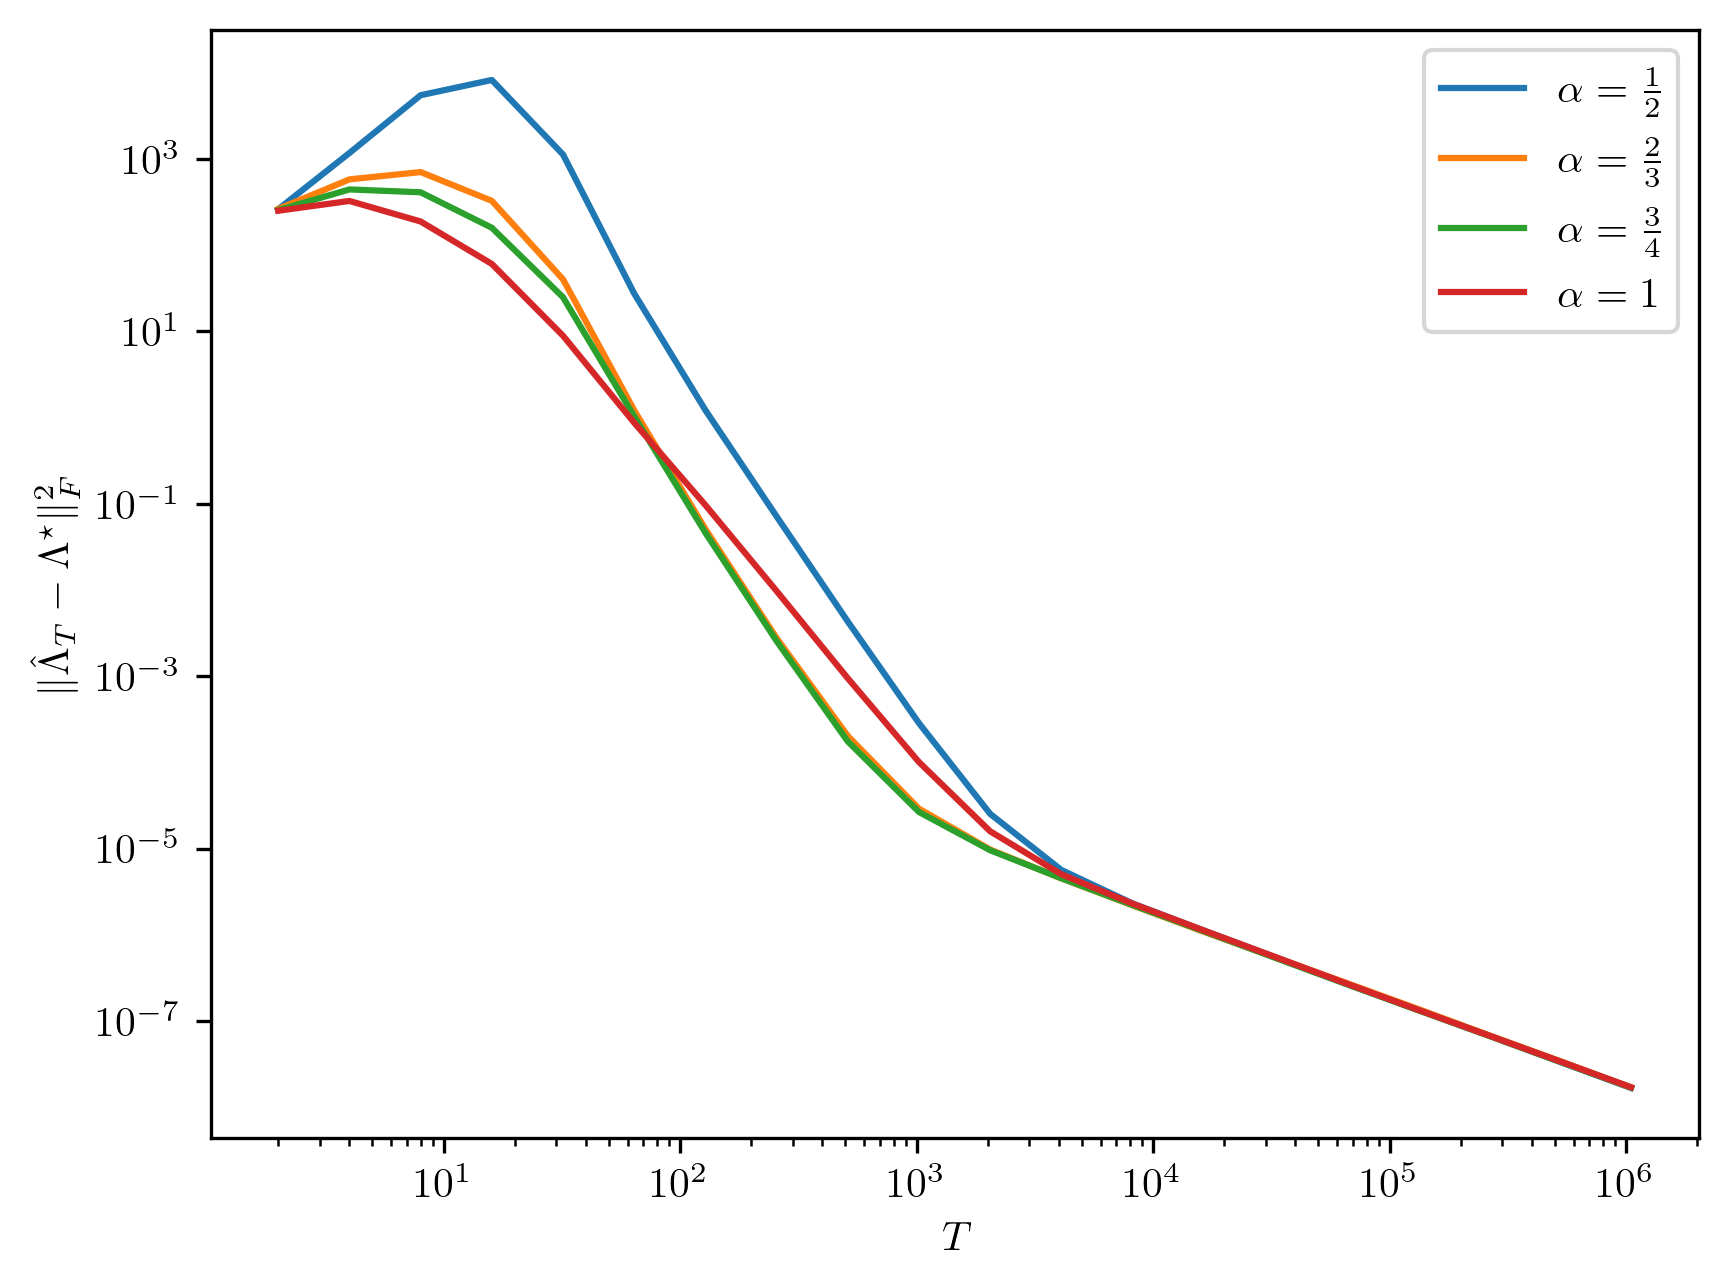

In [11]:
# Figure 5(a)

plt.figure(dpi = 300)
plt.rcParams['text.usetex'] = True

plot_utils.plot_variance_estimation_errors(MRP_params, iid_results2, label = r'$\alpha = \frac{1}{2}$')
plot_utils.plot_variance_estimation_errors(MRP_params, iid_results1, label = r'$\alpha = \frac{2}{3}$')
plot_utils.plot_variance_estimation_errors(MRP_params, iid_results3, label = r'$\alpha = \frac{3}{4}$')
plot_utils.plot_variance_estimation_errors(MRP_params, iid_results5, label = r'$\alpha = 1$')

plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$\|\hat{\Lambda}_T - \Lambda^{\star}\|_F^2$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('reproduce_plots/figure_5a.pdf')

In [12]:
# Load data for different feature dimensions
# d = 5
MRP_params6 = np.load('results/06/MRP.npz')
iid_results6 = np.load('results/06/iid_results.npz')
# d = 7
MRP_params7 = np.load('results/07/MRP.npz')
iid_results7 = np.load('results/07/iid_results.npz')
# d = 9
MRP_params8 = np.load('results/08/MRP.npz')
iid_results8 = np.load('results/08/iid_results.npz')

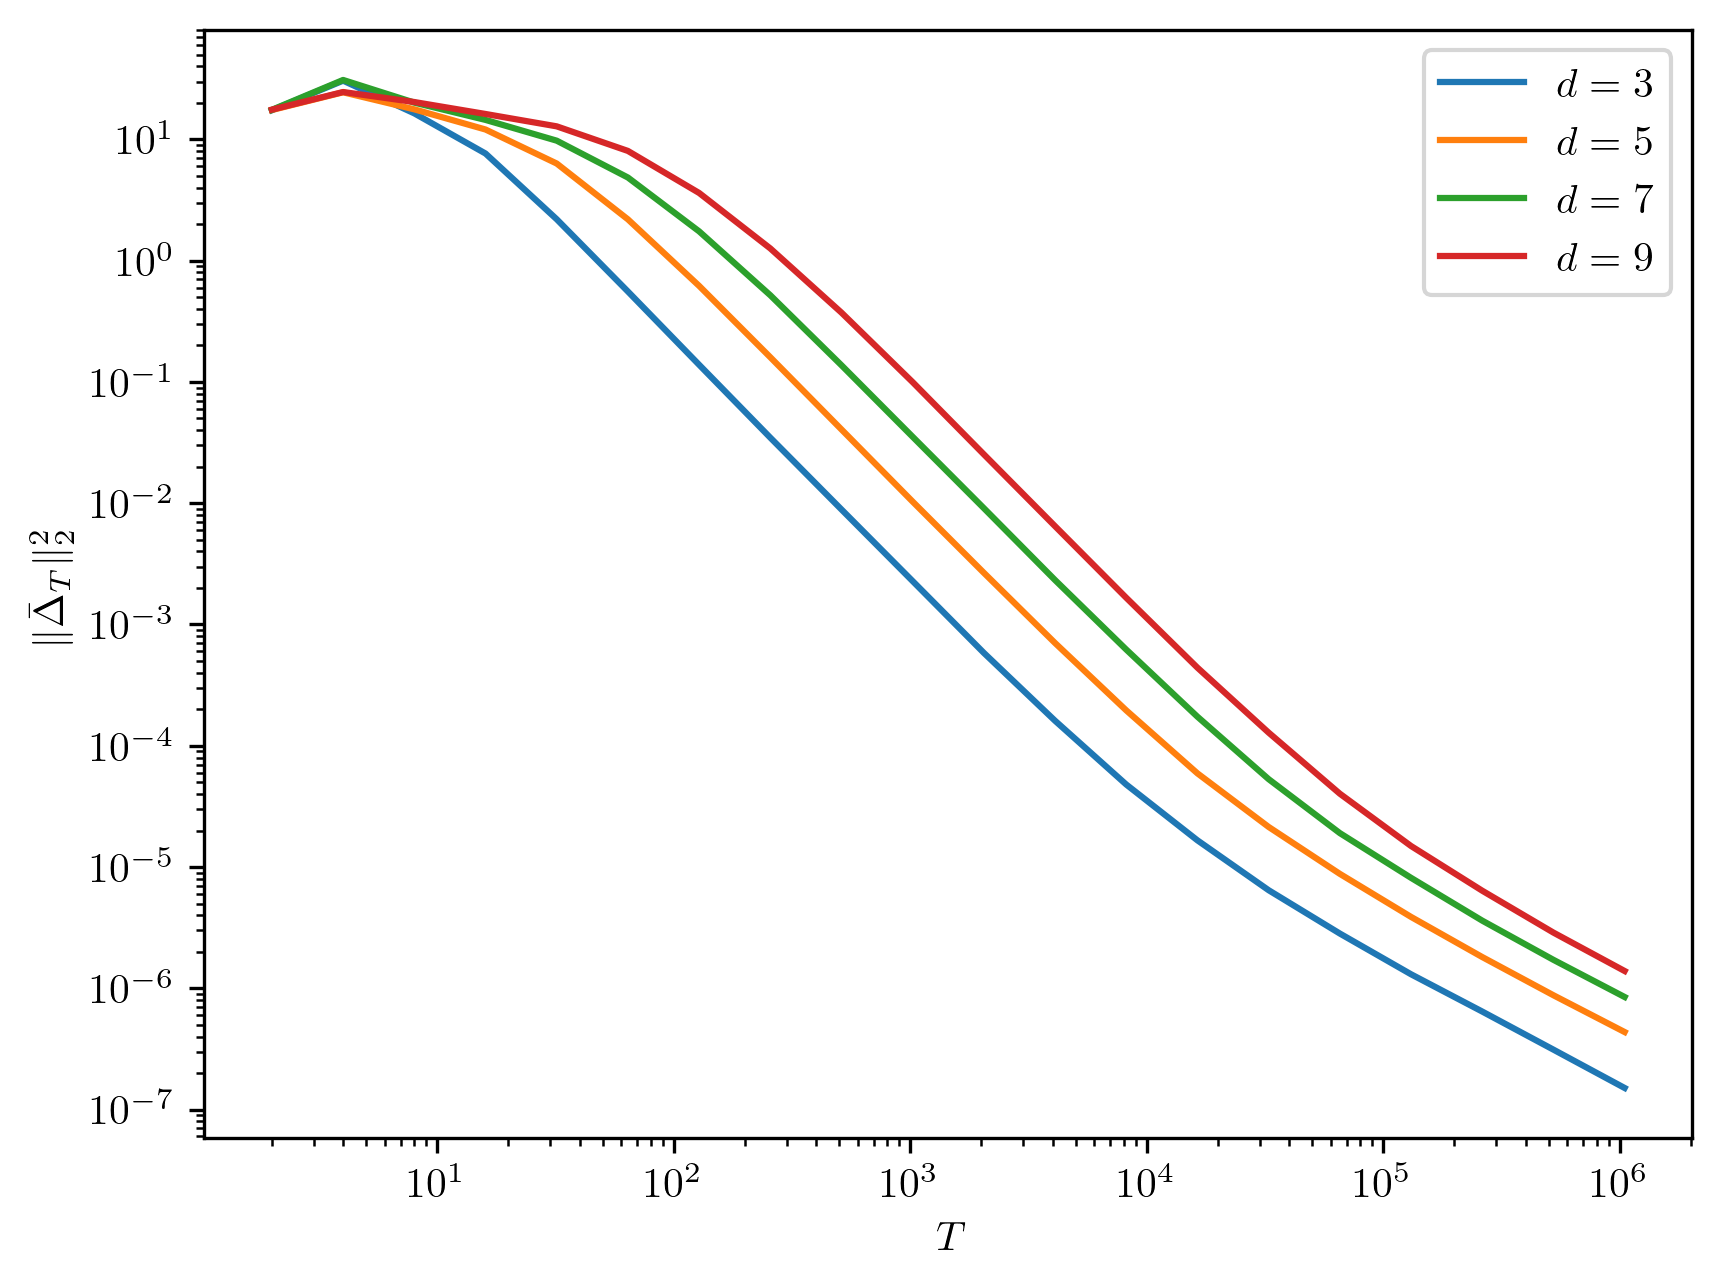

In [13]:
# Figure 3(b)

plt.rcParams['text.usetex'] = True
plt.figure(dpi = 300)
q = 0.95

plot_utils.plot_L2_norm_quantiles(iid_results1, q, label = r'$d=3$')
plot_utils.plot_L2_norm_quantiles(iid_results6, q, label = r'$d=5$')
plot_utils.plot_L2_norm_quantiles(iid_results7, q, label = r'$d=7$')
plot_utils.plot_L2_norm_quantiles(iid_results8, q, label = r'$d=9$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$T$')
plt.ylabel(r'$\|\bar{\Delta}_T\|_2^2$')
plt.legend()
plt.savefig('reproduce_plots/figure_3b.pdf')

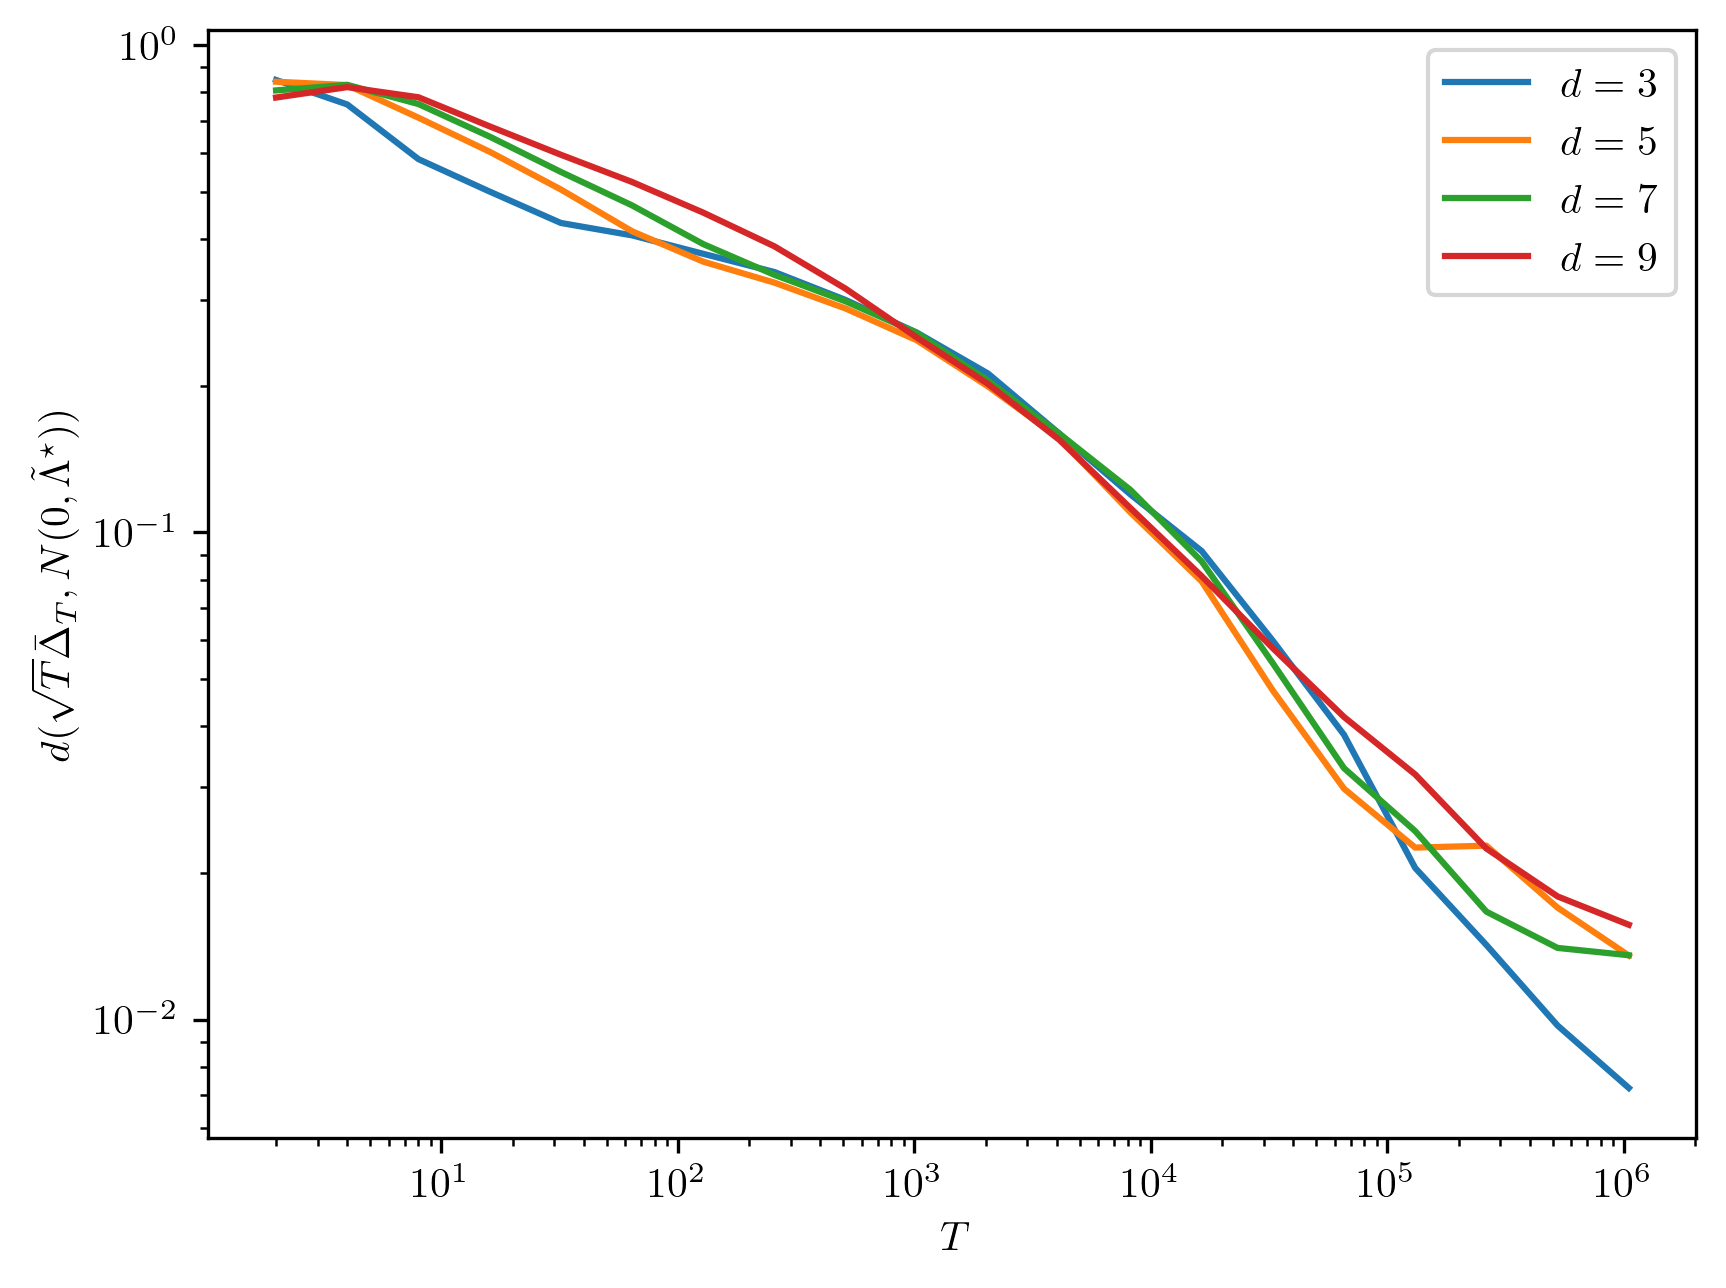

In [14]:
# Figure 4(b)
plt.figure(dpi = 300)
plt.rcParams['text.usetex'] = True

plot_utils.compare_emp_asy(MRP_params, iid_results1, label = r'$d=3$')
plot_utils.compare_emp_asy(MRP_params6, iid_results6, label = r'$d=5$')
plot_utils.compare_emp_asy(MRP_params7, iid_results7, label = r'$d=7$')
plot_utils.compare_emp_asy(MRP_params8, iid_results8, label = r'$d=9$')
plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$d(\sqrt{T}\bar{\Delta}_T,N(0,\tilde{\Lambda}^\star))$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('reproduce_plots/figure_4b.pdf')

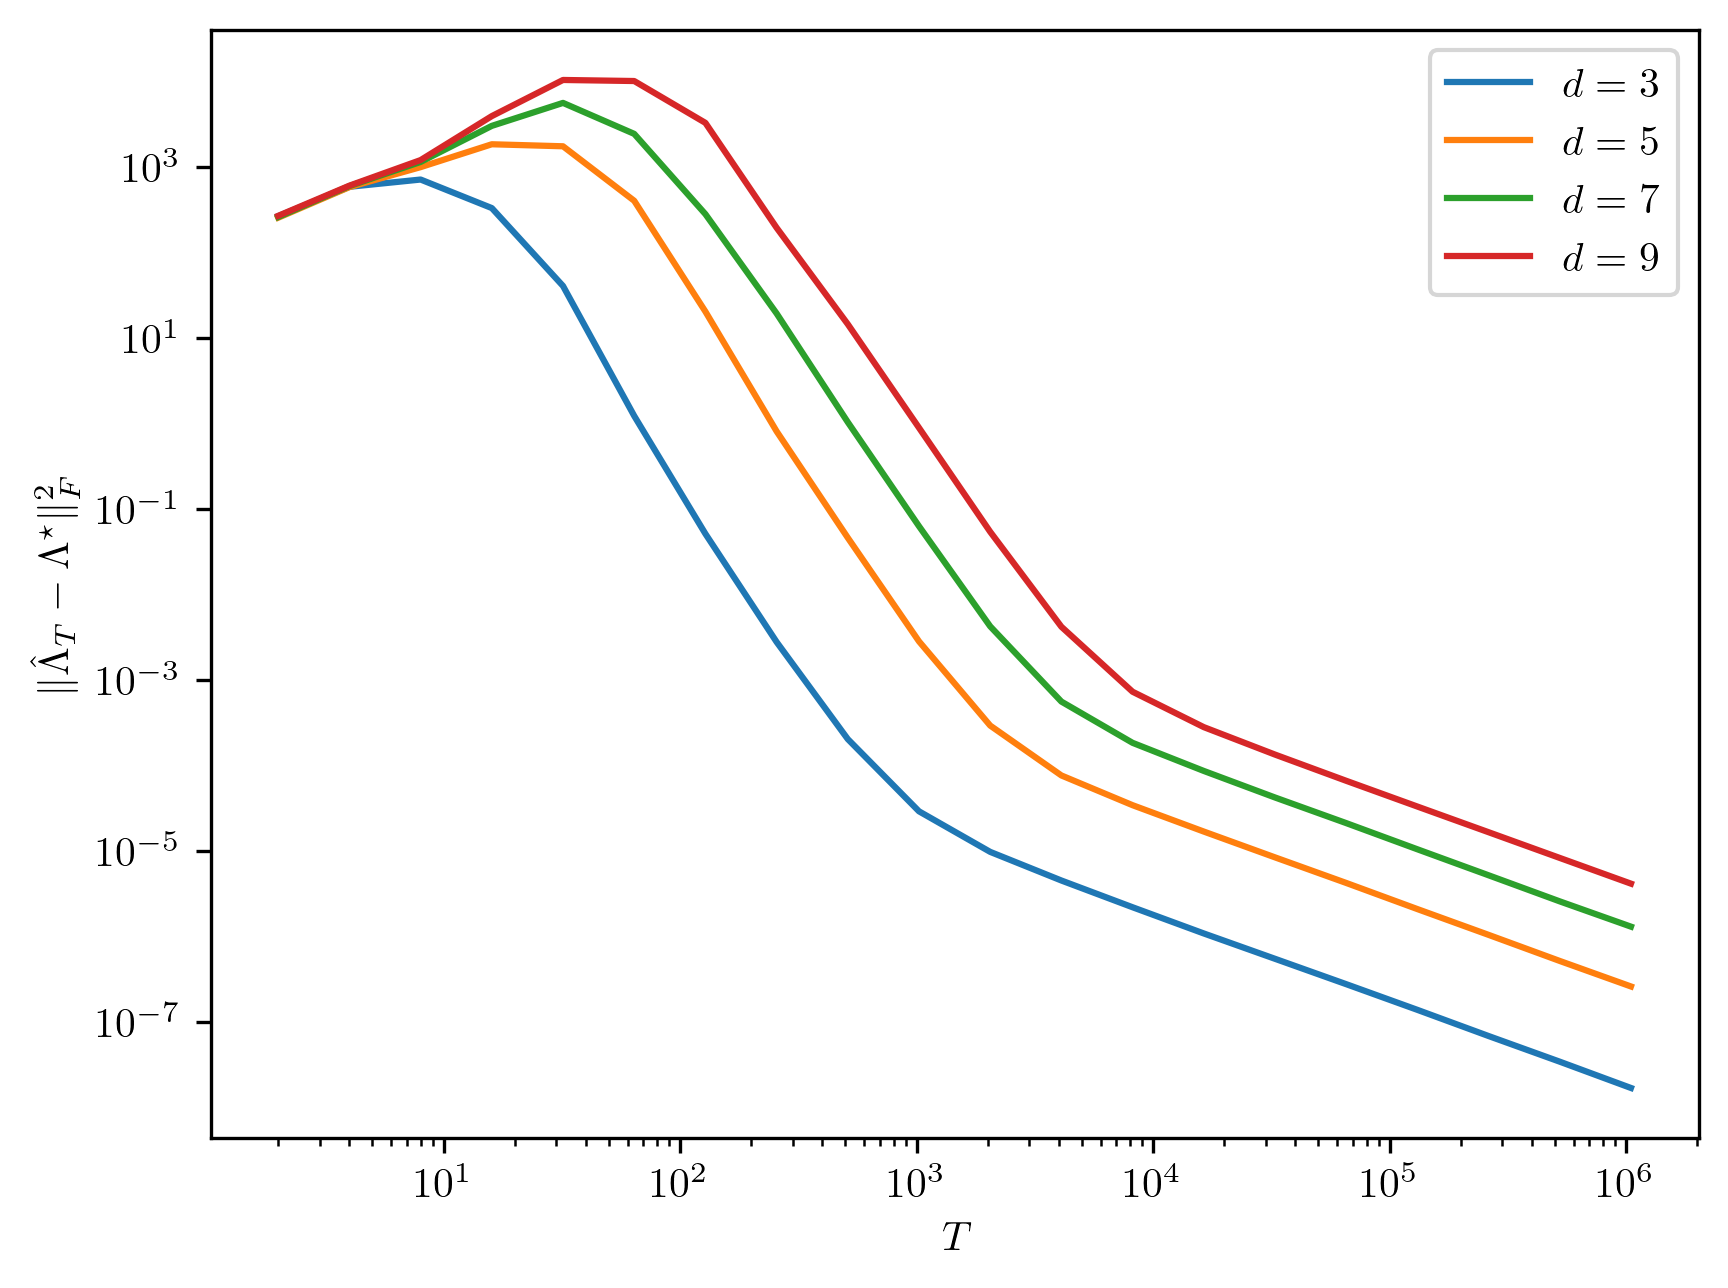

In [15]:
# Figure 5(b)

plt.figure(dpi = 300)
plt.rcParams['text.usetex'] = True

plot_utils.plot_variance_estimation_errors(MRP_params, iid_results1, label = r'$d=3$')
plot_utils.plot_variance_estimation_errors(MRP_params6, iid_results6, label = r'$d=5$')
plot_utils.plot_variance_estimation_errors(MRP_params7, iid_results7, label = r'$d=7$')
plot_utils.plot_variance_estimation_errors(MRP_params8, iid_results8, label = r'$d=9$')

plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$\|\hat{\Lambda}_T - \Lambda^{\star}\|_F^2$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('reproduce_plots/figure_5b.pdf')